In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.min_rows = 10
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # You can also set the default font size

In [3]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix


def unique_count(points):
    if points.size != 0:
        # Compute the distance matrix
        dist_matrix = distance_matrix(points, points)

        # Define a threshold for considering points as the same
        threshold = 0.1

        # Initialize a dictionary to hold representative points and their counts
        unique_points_info = {}

        # Initialize a set to keep track of points that have been clustered
        clustered = set()

        # Iterate through each point to determine uniqueness
        for i in range(len(points)):
            if i in clustered:
                continue
            cluster_count = 1
            for j in range(i + 1, len(points)):
                if dist_matrix[i, j] < threshold:
                    clustered.add(j)
                    cluster_count += 1
            unique_points_info[i] = {'point': points[i], 'count': cluster_count}

        # Extract unique points and their counts
        unique_points = np.array([info['point'] for info in unique_points_info.values()])
        unique_points_counts = np.array([info['count'] for info in unique_points_info.values()])

        # Create a DataFrame
        if points.shape[1] == 2:
            df = pd.DataFrame({'x': unique_points[:, 0], 'y': unique_points[:, 1], 'densitas': unique_points_counts})
        if points.shape[1] == 3:
            df = pd.DataFrame({'x': unique_points[:, 0], 'y': unique_points[:, 1], 'z': unique_points[:, 2], 'densitas': unique_points_counts})
    else:
        df = pd.DataFrame({'x': [], 'y': [], 'densitas': []})
    return df

def check_on_boundaries(data,boundaries):
    if boundaries.shape[1] == 3:
        filtered_data = data[
        (data['x'].between(boundaries[0, 0], boundaries[0, 1])) &
        (data['y'].between(boundaries[1, 0], boundaries[1, 1])) &
        (data['z'].between(boundaries[2, 0], boundaries[2, 1]))
        ]
    elif boundaries.shape[1] == 2:
        filtered_data = data[
        (data['x'].between(boundaries[0, 0], boundaries[0, 1])) &
        (data['y'].between(boundaries[1, 0], boundaries[1, 1])) 
        ]
    return filtered_data

def check_missing_column(data,col_to_check,boundaries):
    missing_columns = []
    for column in col_to_check:
        if column not in data.columns:
            missing_columns.append(column)
    if len(missing_columns) ==0:
        new_data = check_on_boundaries(data,boundaries)
        return new_data
    else:
        return data


# Masalah 1

In [3]:
boundaries_1 = np.array([(-10,10) for _ in range (2)])
columns_to_check_1 = ['x', 'y']

In [4]:
# rade_1_1 = pd.read_excel('Masalah 1/rade_50_250.xlsx',sheet_name="Final Root",header=None)
# root_num_1_1 = rade_1_1[0].value_counts().reset_index(drop=False)
# root_rade_1_1 = rade_1_1[rade_1_1[0]==root_num_1_1.iloc[0,0]]

# rade_1_2 = pd.read_excel('Masalah 1/rade_100_250.xlsx',sheet_name="Final Root",header=None)
# root_num_1_2 = rade_1_2[0].value_counts().reset_index(drop=False)
# root_rade_1_2 = rade_1_2[rade_1_2[0]==root_num_1_2.iloc[0,0]]

# rade_1_3 = pd.read_excel('Masalah 1/rade_250_250.xlsx',sheet_name="Final Root",header=None)
# root_num_1_3 = rade_1_3[0].value_counts().reset_index(drop=False)
# root_rade_1_3 = rade_1_3[rade_1_3[0]==root_num_1_3.iloc[0,0]]

# populasi = [50,100,250]
# rade_1 = pd.DataFrame()
# for i in range(len(populasi)):
#     rade_1_i = pd.read_excel(f'Masalah 1/rade_{str(populasi[i])}_250.xlsx',sheet_name="Final Root",header=None)
#     root_num_1_i = rade_1_i[0].value_counts().reset_index(drop=False)
#     root_rade_1_i = rade_1_i[rade_1_i[0]==root_num_1_i.iloc[0,0]]
#     root_rade_1_i[4] = populasi[i]
#     rade_1 = pd.concat([rade_1,root_rade_1_i],axis=0)
# rade_1.rename(inplace=True, columns={1:"x",2:'y',3:'score',4:'Populasi'})
# rade_1.drop(inplace=True,columns=[0])
# rade_1.sort_values(by=['Populasi'],ascending=False,inplace=True)

# cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
# sns.scatterplot(data=rade_1,x='x',y='y',hue='Populasi',palette=cmap,size='Populasi',sizes=(20,200),style='Populasi',markers=['o', 's', '^'], hue_order=populasi)


# plt.xlim(boundaries_1[0])
# plt.ylim(boundaries_1[1])
# plt.grid(True)

,x,y,score,Populasi
1,0.667121,0.690103,-1.000000,50
2,-0.932122,1.067875,-1.000000,50
4,-0.932122,1.067874,-1.000000,50
5,0.667121,0.690103,-1.000000,50
6,-0.932122,1.067875,-0.999999,50


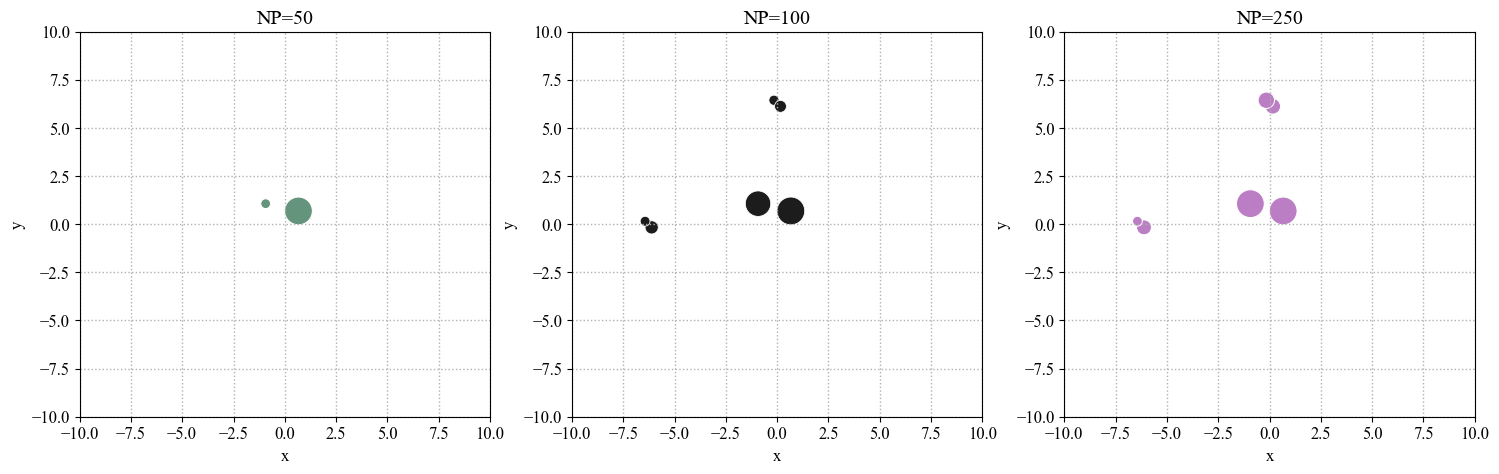

In [5]:
populasi = [50,100,250]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
color_map = ['#65947c','#1c1c1c','#bb7dc3']
rade_1 = pd.DataFrame()
for i in range(len(populasi)):
    rade_1_i = pd.read_excel(f'Hasil Running/Problem 1/RADE/rade_{str(populasi[i])}_250.xlsx',sheet_name="Final Root",header=None)
    rade_1_i.rename(inplace=True, columns={0:"iter",1:'x',2:'y',3:'score'})
    rade_1_i = check_missing_column(rade_1_i,columns_to_check_1,boundaries_1)
    rade_1_i.dropna(inplace=True)
    rade_1_i_unique = unique_count(rade_1_i.iloc[:,1:3].values)
    sns.scatterplot(ax=axes[i],data = rade_1_i_unique,x='x',y='y',size='densitas',sizes = (50,400),legend=False, color=color_map[i])
    axes[i].set_xlim(boundaries_1[0])
    axes[i].set_ylim(boundaries_1[1])
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set(title=f"NP={populasi[i]}")
    
    rade_1_i['Populasi'] = populasi[i]
    rade_1 = pd.concat([rade_1,rade_1_i],axis=0)

fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 1/RADE, Masalah 1, Persebaran Akar.png')
rade_1.drop(inplace=True,columns=['iter'])
rade_1.head()

,Populasi,x,y,score
0,50,NaN,NaN,NaN
1,50,NaN,NaN,NaN
2,50,NaN,NaN,NaN
3,50,NaN,NaN,NaN
4,50,NaN,NaN,NaN


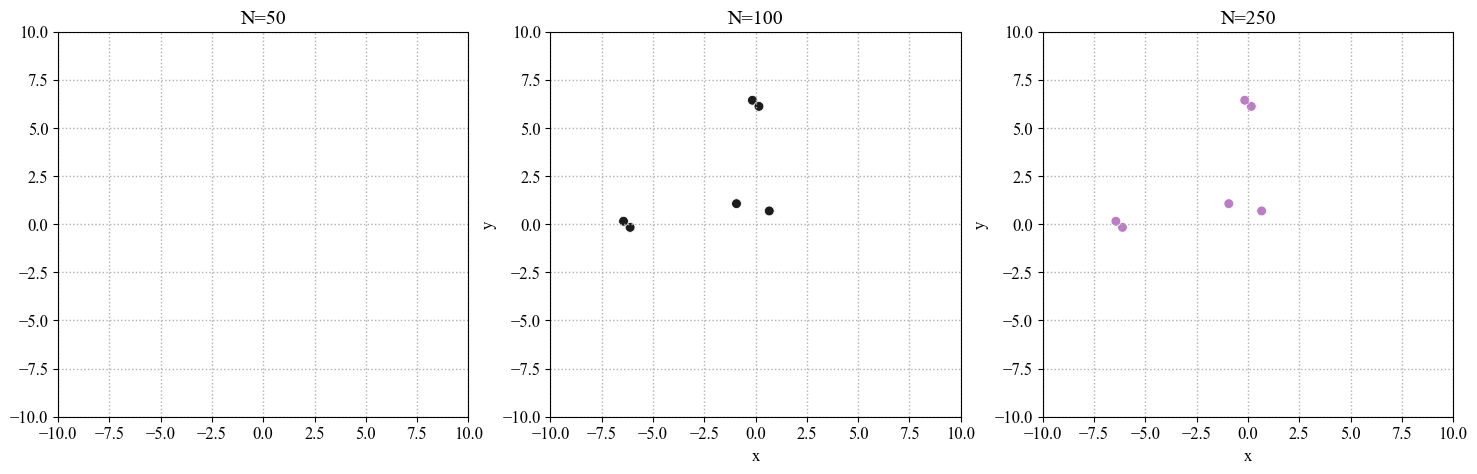

In [6]:
populasi = [50,100,250]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
color_map = ['#65947c','#1c1c1c','#bb7dc3']
hde_1 = pd.DataFrame()
for i in range(len(populasi)):
    hde_1_i = pd.read_excel(f'Hasil Running/Problem 1/HDE/hde_{str(populasi[i])}_250.xlsx',sheet_name="Final Root",header=None)
    hde_1_i.rename(inplace=True, columns={0:"iter",1:'x',2:'y',3:'score'})
    hde_1_i = check_missing_column(hde_1_i,columns_to_check_1,boundaries_1)
    hde_1_i.dropna(inplace=True,axis=0)
    hde_1_i_unique = unique_count(hde_1_i.iloc[:,1:3].values)
    sns.scatterplot(ax=axes[i],data = hde_1_i_unique,x='x',y='y',size='densitas',sizes = (50,400),legend=False, color=color_map[i])
    axes[i].set_xlim(boundaries_1[0])
    axes[i].set_ylim(boundaries_1[1])
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set(title=f"N={populasi[i]}")
    
    hde_1_i['Populasi'] = populasi[i]
    hde_1 = pd.concat([hde_1,hde_1_i],axis=0)

fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 1/HDE, Masalah 1, Persebaran Akar.png')
hde_1.drop(inplace=True,columns=['iter'])
hde_1.head()

,x,y,score,Populasi
0,-0.932122,1.067874,-1.0,50
1,0.163333,6.122434,-1.0,50
2,0.667121,0.690103,-1.0,50
3,-0.155283,6.439836,-1.0,50
4,-6.437163,0.155348,-1.0,50


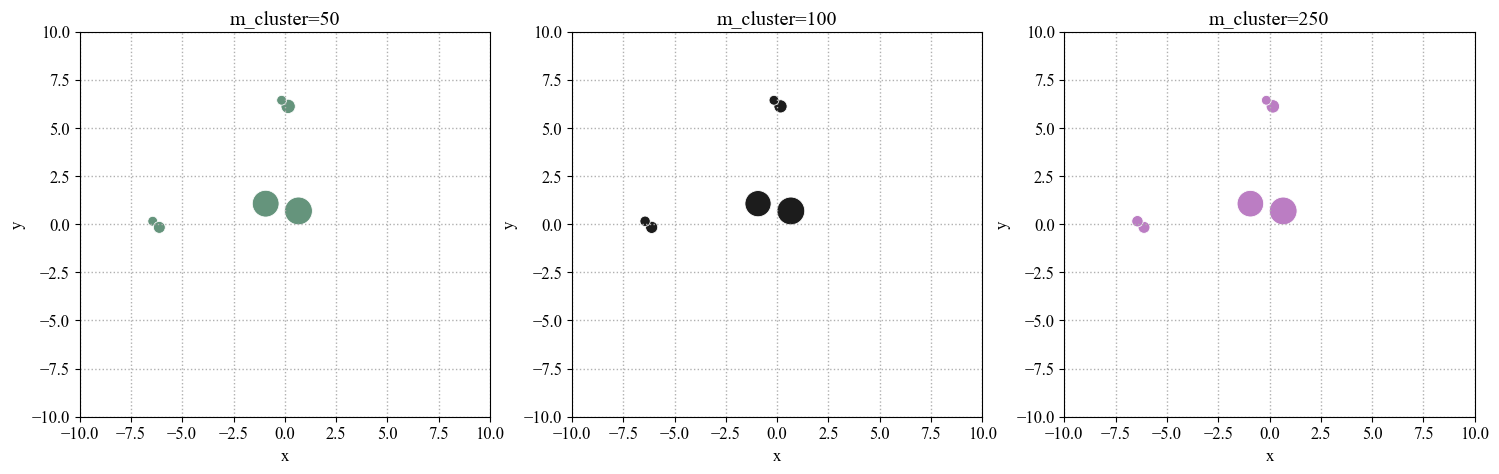

In [7]:
populasi = [50,100,250]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
color_map = ['#65947c','#1c1c1c','#bb7dc3']
sdde_1 = pd.DataFrame()
for i in range(len(populasi)):
    sdde_1_i = pd.read_excel(f'Hasil Running/Problem 1/SDDE/sdde_{str(populasi[i])}_250.xlsx',sheet_name="Final Root",header=None)
    sdde_1_i.rename(inplace=True, columns={0:"iter",1:'x',2:'y',3:'score'})
    sdde_1_i = check_missing_column(sdde_1_i,columns_to_check_1,boundaries_1)
    sdde_1_i.dropna(inplace=True,axis=0)
    sdde_1_i_unique = unique_count(sdde_1_i.iloc[:,1:3].values)
    sns.scatterplot(ax=axes[i],data = sdde_1_i_unique,x='x',y='y',size='densitas',sizes = (50,400),legend=False, color=color_map[i])
    axes[i].set_xlim(boundaries_1[0])
    axes[i].set_ylim(boundaries_1[1])
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set(title=f"m_cluster={populasi[i]}")
    
    sdde_1_i['Populasi'] = populasi[i]
    sdde_1 = pd.concat([sdde_1,sdde_1_i],axis=0)

fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 1/SDDE, Masalah 1, Persebaran Akar.png')
sdde_1.drop(inplace=True,columns=['iter'])
sdde_1.head()

# Masalah 2

In [6]:
boundaries_2 = np.array([[-1,3],[-17,4]])
columns_to_check_2 = ['x', 'y']

          x          y  densitas
0  1.604571 -13.362902         2
1  1.578225 -12.176689         3
2  1.433949  -6.820766         8
3 -0.260599   0.622532        29
4  1.294360  -3.137220        10
5  1.481320  -8.383613         5
6  1.337426  -4.140439         4
7  1.530505 -10.202248         1
8  1.654583 -15.819188         1
           x          y  densitas
0   1.337426  -4.140439       110
1   1.481320  -8.383613       110
2   1.530505 -10.202248       110
3  -0.260599   0.622533       110
4   1.604571 -13.362902       110
5   1.578225 -12.176690       110
6   0.299448   2.836926       110
7   1.433949  -6.820765       110
8   0.499999   3.141592       110
9   1.654583 -15.819190       110
10  1.294360  -3.137218       110
11  1.663422 -16.282790       106
           x          y  densitas
0   1.654583 -15.819188       110
1   1.433949  -6.820766       110
2   1.604571 -13.362902       110
3   1.530505 -10.202248       110
4   0.499999   3.141593       110
5   1.337426  -4.140440 

,x,y,score,Populasi
1,1.604571,-13.362902,-1.000000,100
4,1.578225,-12.176689,-0.999999,100
5,1.433949,-6.820766,-0.999999,100
7,-0.260599,0.622532,-0.999999,100
11,-0.260600,0.622530,-1.000000,100


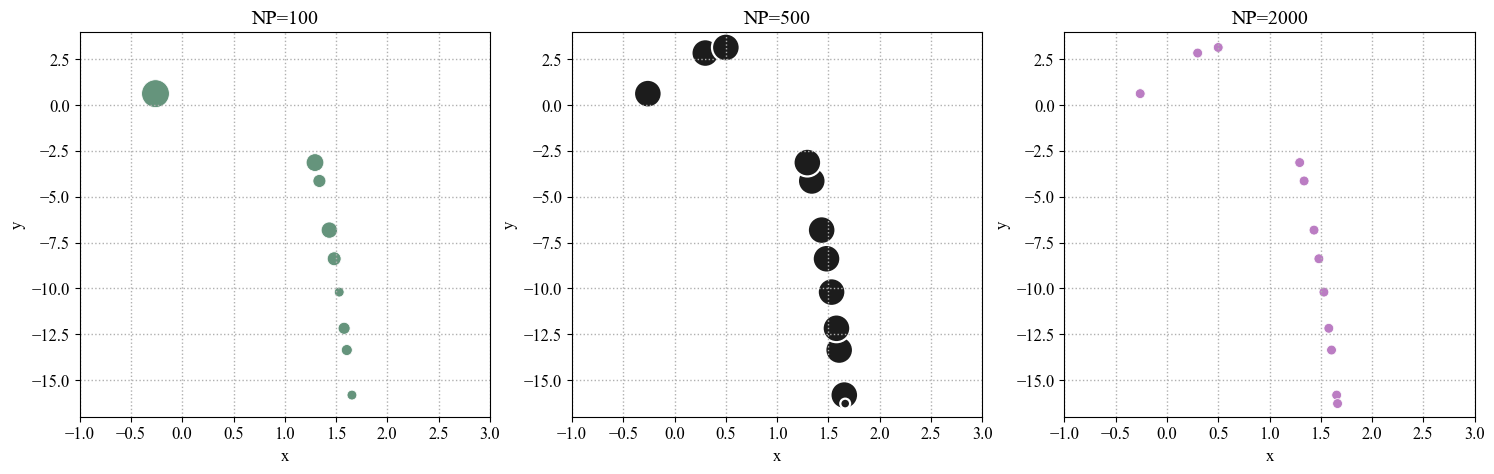

In [7]:
populasi = [100,500,2000]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
color_map = ['#65947c','#1c1c1c','#bb7dc3']
rade_2 = pd.DataFrame()
for i in range(len(populasi)):
    rade_2_i = pd.read_excel(f'Hasil Running/Problem 2/RADE/rade_{str(populasi[i])}_300.xlsx',sheet_name="Final Root",header=None)
    rade_2_i.rename(inplace=True, columns={0:"iter",1:'x',2:'y',3:'score'})
    rade_2_i = check_missing_column(rade_2_i,columns_to_check_2,boundaries_2)
    rade_2_i.dropna(inplace=True)
    rade_2_i_unique = unique_count(rade_2_i.iloc[:,1:3].values)
    print(rade_2_i_unique)
    sns.scatterplot(ax=axes[i],data = rade_2_i_unique,x='x',y='y',size='densitas',sizes = (50,400),legend=False, color=color_map[i])
    axes[i].set_xlim(boundaries_2[0])
    axes[i].set_ylim(boundaries_2[1])
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set(title=f"NP={populasi[i]}")
    
    rade_2_i['Populasi'] = populasi[i]
    rade_2 = pd.concat([rade_2,rade_2_i],axis=0)

fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 2/RADE, Masalah 2, Persebaran Akar.png')
rade_2.drop(inplace=True,columns=['iter'])
rade_2.head()

,x,y,score,Populasi
0,1.654583,-15.819188,-1.0,100
1,1.604571,-13.362902,-1.0,100
2,1.578225,-12.176690,-1.0,100
3,1.530505,-10.202248,-1.0,100
4,1.433949,-6.820765,-1.0,100


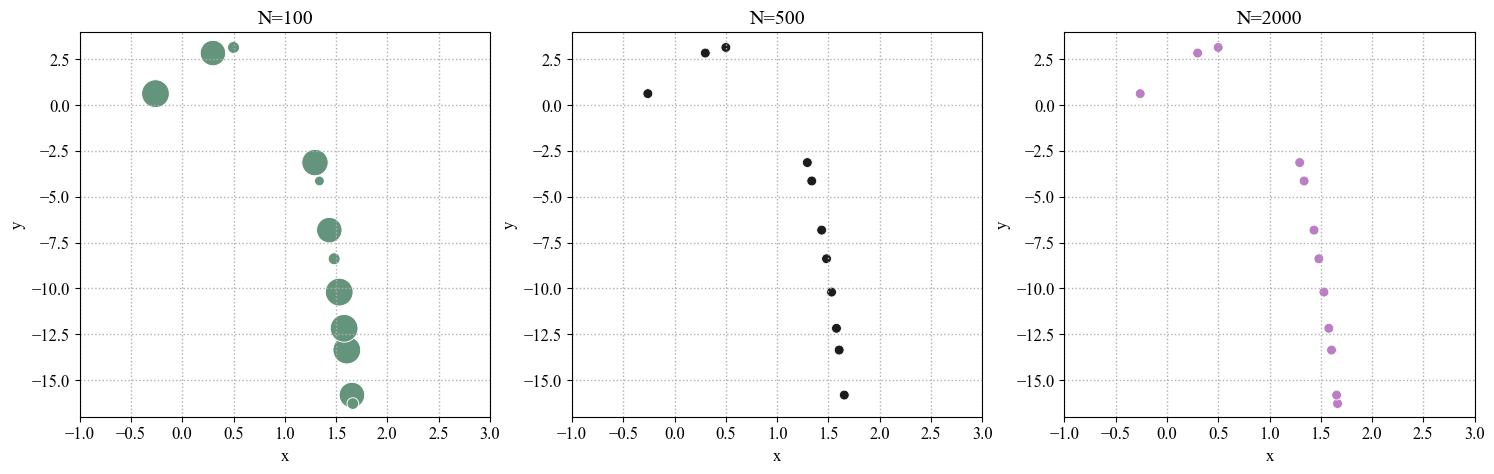

In [10]:
populasi = [100,500,2000]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
color_map = ['#65947c','#1c1c1c','#bb7dc3']
hde_2 = pd.DataFrame()
for i in range(len(populasi)):
    hde_2_i = pd.read_excel(f'Hasil Running/Problem 2/HDE/hde_{str(populasi[i])}_300.xlsx',sheet_name="Final Root",header=None)
    hde_2_i.rename(inplace=True, columns={0:"iter",1:'x',2:'y',3:'score'})
    hde_2_i = check_missing_column(hde_2_i,columns_to_check_2,boundaries_2)
    hde_2_i.dropna(inplace=True)
    hde_2_i_unique = unique_count(hde_2_i.iloc[:,1:3].values)
    sns.scatterplot(ax=axes[i],data = hde_2_i_unique,x='x',y='y',size='densitas',sizes = (50,400),legend=False, color=color_map[i])
    axes[i].set_xlim(boundaries_2[0])
    axes[i].set_ylim(boundaries_2[1])
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set(title=f"N={populasi[i]}")
    
    hde_2_i['Populasi'] = populasi[i]
    hde_2 = pd.concat([hde_2,hde_2_i],axis=0)

fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 2/HDE, Masalah 2, Persebaran Akar.png')
hde_2.drop(inplace=True,columns=['iter'])
hde_2.head()

,x,y,score,Populasi
0,0.500000,3.141593,-1.0,100
1,-0.260599,0.622531,-1.0,100
2,1.294360,-3.137220,-1.0,100
3,-0.260599,0.622531,-1.0,100
4,1.433949,-6.820765,-1.0,100


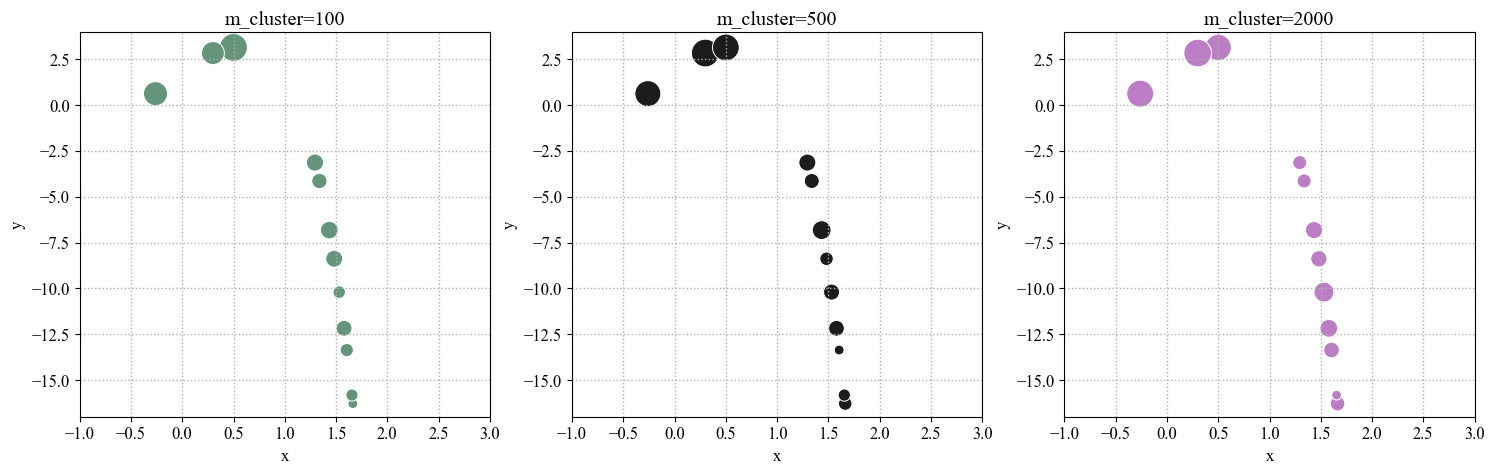

In [11]:
populasi = [100,500,2000]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmap = sns.diverging_palette(145, 300, s=60,l=60,center='dark', as_cmap=True)
color_map = ['#65947c','#1c1c1c','#bb7dc3']
sdde_2 = pd.DataFrame()
for i in range(len(populasi)):
    sdde_2_i = pd.read_excel(f'Hasil Running/Problem 2/SDDE/sdde_{str(populasi[i])}_300.xlsx',sheet_name="Final Root",header=None)
    sdde_2_i.rename(inplace=True, columns={0:"iter",1:'x',2:'y',3:'score'})
    sdde_2_i = check_missing_column(sdde_2_i,columns_to_check_2,boundaries_2)
    sdde_2_i.dropna(inplace=True)
    sdde_2_i_unique = unique_count(sdde_2_i.iloc[:,1:3].values)
    sns.scatterplot(ax=axes[i],data = sdde_2_i_unique,x='x',y='y',size='densitas',sizes = (50,400),legend=False, color=color_map[i])
    axes[i].set_xlim(boundaries_2[0])
    axes[i].set_ylim(boundaries_2[1])
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set(title=f"m_cluster={populasi[i]}")
    
    sdde_2_i['Populasi'] = populasi[i]
    sdde_2 = pd.concat([sdde_2,sdde_2_i],axis=0)

fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 2/SDDE, Masalah 2, Persebaran Akar.png')
sdde_2.drop(inplace=True,columns=['iter'])
sdde_2.head()

# Masalah 3

In [4]:
boundaries_3 = np.array([[0,2],[-10,10],[-1,1]])
columns_to_check_3 = ['x', 'y', 'z']

          x         y         z  densitas
0  0.825297 -0.859034 -0.151947       101
1  1.983283  0.983378 -0.016762        84
2  1.981360 -2.172180  0.775732       101
3  1.533661 -1.648068  0.499604        36
4  1.299491  0.525835 -0.642769        16
          x         y         z  densitas
0  0.825297 -0.859035 -0.151946       110
1  1.981360 -2.172180  0.775730       109
2  1.533662 -1.648068  0.499604       110
3  1.983283  0.983378 -0.016762        77
4  1.299490  0.525835 -0.642769       102
          x         y         z  densitas
0  1.983283  0.983378 -0.016762        98
1  0.825297 -0.859035 -0.151947       110
2  1.533662 -1.648068  0.499604       110
3  1.981360 -2.172180  0.775731       110
4  1.299490  0.525835 -0.642769       110


,x,y,z,score,Populasi
0,0.825297,-0.859034,-0.151947,-0.999999,100
1,1.983283,0.983378,-0.016762,-1.000000,100
2,1.981360,-2.172180,0.775732,-0.999999,100
3,1.983283,0.983378,-0.016761,-1.000000,100
4,1.981360,-2.172180,0.775731,-1.000000,100


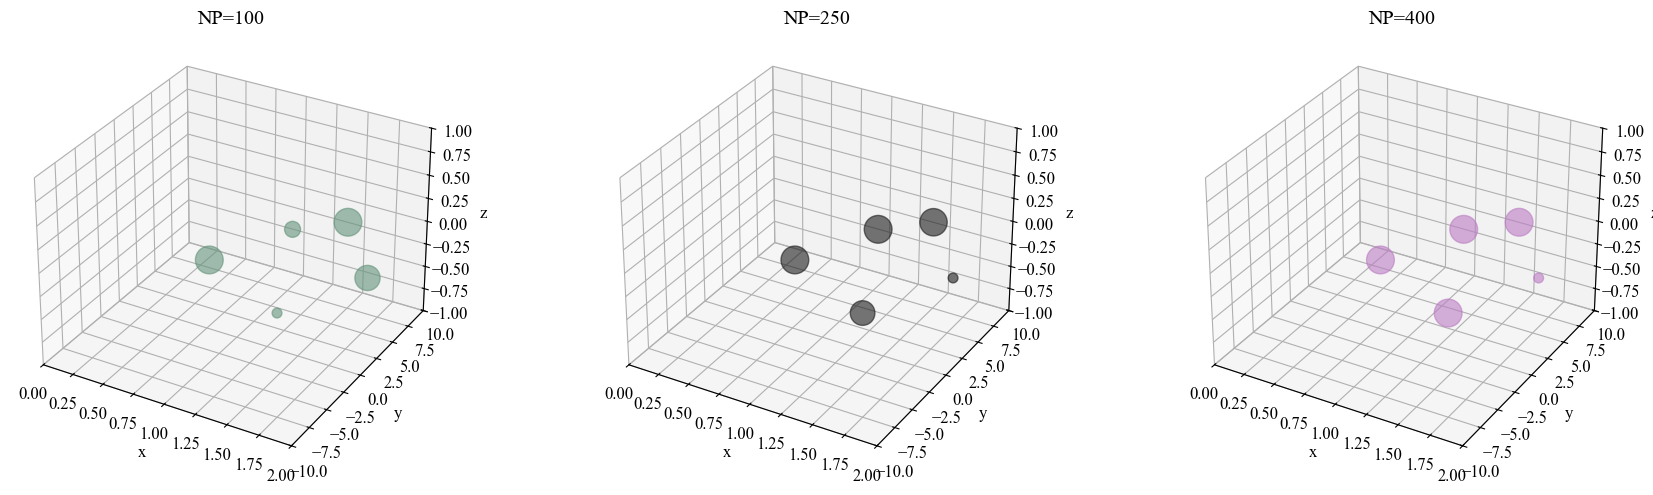

In [13]:
populasi = [100,250,400]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})
color_map = ['#65947c','#1c1c1c','#bb7dc3']
rade_3 = pd.DataFrame()
size_range = (50, 400)

# Iterate over each population
for i in range(len(populasi)):
    # Read data for each population
    rade_3_i = pd.read_excel(f'Hasil Running/Problem 7/RADE/rade_{str(populasi[i])}_400.xlsx', sheet_name="Final Root", header=None)
    rade_3_i.rename(inplace=True, columns={0: "iter", 1: 'x', 2: 'y', 3: 'z', 4:'score'})
    rade_3_i = check_missing_column(rade_3_i,columns_to_check_3,boundaries_3)
    rade_3_i.dropna(inplace=True)
    rade_3_i_unique = unique_count(rade_3_i.iloc[:, 1:4].values)
    print(rade_3_i_unique)
    
    # Scatter plot for each population

    min_size = size_range[0]
    max_size = size_range[1]
    sizes_normalized = (rade_3_i_unique['densitas'] - min(rade_3_i_unique['densitas'])) / (max(rade_3_i_unique['densitas']) - min(rade_3_i_unique['densitas']))
    sizes = sizes_normalized * (max_size - min_size) + min_size

    axes[i].scatter(xs=rade_3_i_unique['x'], ys=rade_3_i_unique['y'], zs=rade_3_i_unique['z'], c=color_map[i], alpha=0.6,s = sizes)
    axes[i].set_xlim(boundaries_3[0])
    axes[i].set_xlabel("x")
    axes[i].set_ylim(boundaries_3[1])
    axes[i].set_ylabel("y")
    axes[i].set_zlim(boundaries_3[2])
    axes[i].set_zlabel("z")
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set_title(f"NP={populasi[i]}")
    
    rade_3_i['Populasi'] = populasi[i]
    rade_3 = pd.concat([rade_3, rade_3_i], axis=0)


# Adjust layout and show plot
plt.tight_layout()
fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 3/RADE, Masalah 3, Persebaran Akar.png')
rade_3.drop(inplace=True,columns=['iter'])
rade_3.head()

          x         y         z  densitas
0  1.299490  0.525835 -0.642769       110
1  0.825297 -0.859034 -0.151946       110
2  1.983283  0.983378 -0.016762       110
3  1.533662 -1.648068  0.499604       110
4  1.981360 -2.172180  0.775731       110
          x         y         z  densitas
0  1.299490  0.525835 -0.642769       110
1  1.983283  0.983378 -0.016762       110
2  1.533662 -1.648068  0.499604       110
3  1.981360 -2.172180  0.775731       110
          x         y         z  densitas
0  1.299490  0.525835 -0.642769       110
1  1.983283  0.983378 -0.016762       110
2  1.533662 -1.648068  0.499604       110
3  1.981360 -2.172180  0.775731       110


,x,y,z,score,Populasi
0,1.299490,0.525835,-0.642769,-1.0,100
1,0.825297,-0.859034,-0.151946,-1.0,100
2,1.983283,0.983378,-0.016762,-1.0,100
3,1.533662,-1.648068,0.499604,-1.0,100
4,1.981360,-2.172180,0.775731,-1.0,100


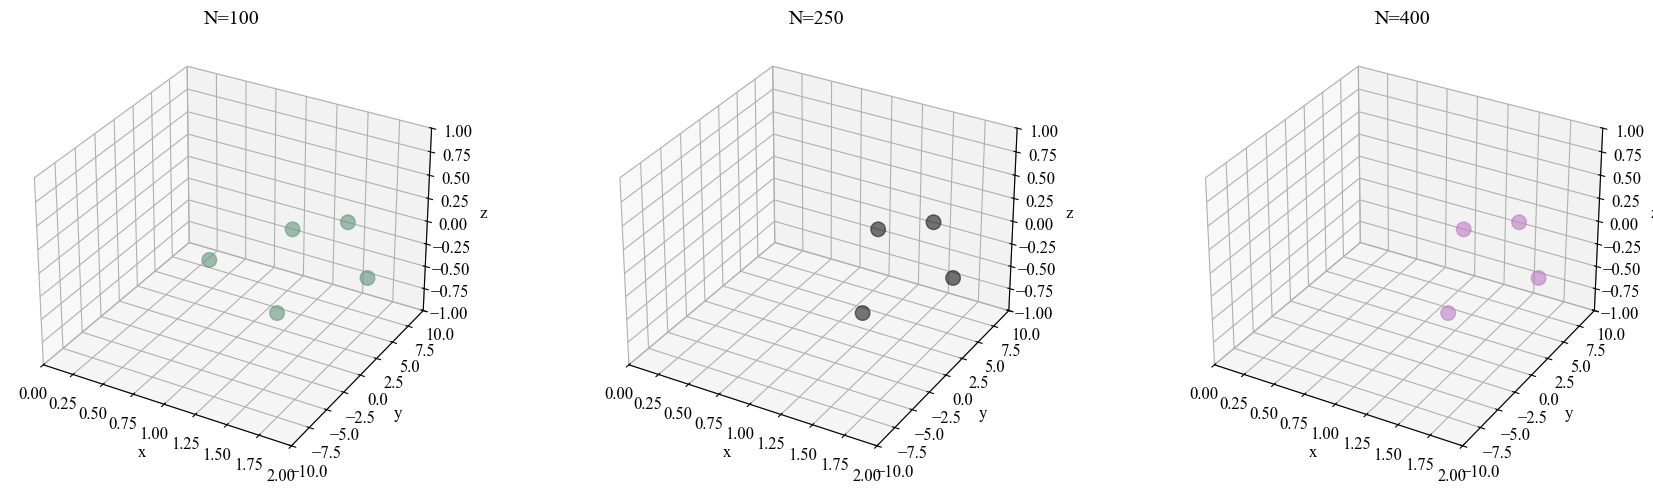

In [5]:
populasi = [100,250,400]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})
color_map = ['#65947c','#1c1c1c','#bb7dc3']
hde_3 = pd.DataFrame()
size_range = (50, 400)

# Iterate over each population
for i in range(len(populasi)):
    # Read data for each population
    hde_3_i = pd.read_excel(f'Hasil Running/Problem 7/HDE/hde_{str(populasi[i])}_400.xlsx', sheet_name="Final Root", header=None)
    hde_3_i.rename(inplace=True, columns={0: "iter", 1: 'x', 2: 'y', 3: 'z', 4:'score'})
    hde_3_i = check_missing_column(hde_3_i,columns_to_check_3,boundaries_3)
    hde_3_i.dropna(inplace=True)
    hde_3_i_unique = unique_count(hde_3_i.iloc[:, 1:4].values)
    print(hde_3_i_unique)
    
    # Scatter plot for each population
    axes[i].scatter(xs=hde_3_i_unique['x'], ys=hde_3_i_unique['y'], zs=hde_3_i_unique['z'], c=color_map[i], alpha=0.6,s = hde_3_i_unique['densitas'])
    axes[i].set_xlim(boundaries_3[0])
    axes[i].set_xlabel("x")
    axes[i].set_ylim(boundaries_3[1])
    axes[i].set_ylabel("y")
    axes[i].set_zlim(boundaries_3[2])
    axes[i].set_zlabel("z")
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set_title(f"N={populasi[i]}")
    
    hde_3_i['Populasi'] = populasi[i]
    hde_3 = pd.concat([hde_3, hde_3_i], axis=0)


# Adjust layout and show plot
plt.tight_layout()
fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 3/HDE, Masalah 3, Persebaran Akar.png')
hde_3.drop(inplace=True,columns=['iter'])
hde_3.head()

,x,y,z,score,Populasi
0,1.299490,0.525835,-0.642769,-1.0,100
1,1.983283,0.983378,-0.016762,-1.0,100
2,1.299490,0.525835,-0.642769,-1.0,100
3,0.825297,-0.859034,-0.151946,-1.0,100
4,1.299490,0.525835,-0.642769,-1.0,100
...,...,...,...,...,...
324,0.825297,-0.859034,-0.151946,-1.0,400
325,1.299490,0.525835,-0.642769,-1.0,400
326,0.825297,-0.859034,-0.151946,-1.0,400
327,1.299490,0.525835,-0.642769,-1.0,400


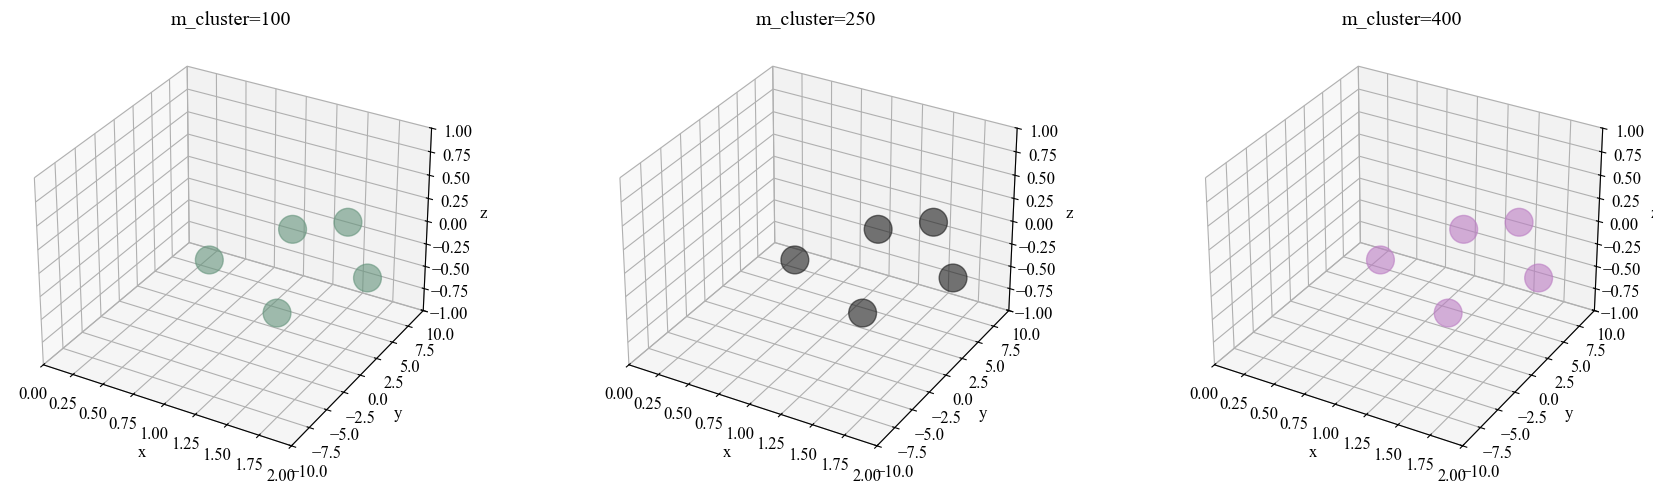

In [15]:
populasi = [100,250,400]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})
color_map = ['#65947c','#1c1c1c','#bb7dc3']
sdde_3 = pd.DataFrame()
size_range = (400, 400)

# Iterate over each population
for i in range(len(populasi)):
    # Read data for each population
    sdde_3_i = pd.read_excel(f'Hasil Running/Problem 7/SDDE/sdde_{str(populasi[i])}_400.xlsx', sheet_name="Final Root", header=None)
    sdde_3_i.rename(inplace=True, columns={0: "iter", 1: 'x', 2: 'y', 3: 'z', 4:'score'})
    sdde_3_i = check_missing_column(sdde_3_i,columns_to_check_3,boundaries_3)
    sdde_3_i.dropna(inplace=True)
    sdde_3_i_unique = unique_count(sdde_3_i.iloc[:, 1:4].values)
    
    # Scatter plot for each population
    min_size = size_range[0]
    max_size = size_range[1]
    sizes_normalized = (sdde_3_i_unique['densitas'] - min(sdde_3_i_unique['densitas'])) / (max(sdde_3_i_unique['densitas']) - min(sdde_3_i_unique['densitas']))
    sizes = sizes_normalized * (max_size - min_size) + min_size
    axes[i].scatter(xs=sdde_3_i_unique['x'], ys=sdde_3_i_unique['y'], zs=sdde_3_i_unique['z'], c=color_map[i], alpha=0.6,s = sizes)
    axes[i].set_xlim(boundaries_3[0])
    axes[i].set_xlabel("x")
    axes[i].set_ylim(boundaries_3[1])
    axes[i].set_ylabel("y")
    axes[i].set_zlim(boundaries_3[2])
    axes[i].set_zlabel("z")
    axes[i].grid(visible=True,linestyle=':',linewidth=1)
    axes[i].set_title(f"m_cluster={populasi[i]}")
    
    sdde_3_i['Populasi'] = populasi[i]
    sdde_3 = pd.concat([sdde_3, sdde_3_i], axis=0)


# Adjust layout and show plot
plt.tight_layout()
fig.savefig(f'D:/OneDrive - Institut Teknologi Bandung/[AKADEMIK]/Semester 7-8/TA/Draft/Draft Buku/Gambar/Stat/Masalah 3/SDDE, Masalah 3, Persebaran Akar.png')
sdde_3.drop(inplace=True,columns=['iter'])
sdde_3